<a href="https://colab.research.google.com/github/NoelleMtz/deep-learning-challenge/blob/main/AlphabetSoupCharity_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 3: Optimize the Model
Using your knowledge of TensorFlow, optimize your model to achieve a target predictive accuracy higher than 75%.

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [3]:
# Drop the non-beneficial ID columns, 'EIN'
application_df.drop(columns = ['EIN'], inplace=True)
application_df

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...
34294,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [4]:
# Determine the number of unique values in each column.
for bob in application_df.columns:
    print(bob, len(application_df[bob].unique()))

NAME 19568
APPLICATION_TYPE 17
AFFILIATION 6
CLASSIFICATION 71
USE_CASE 5
ORGANIZATION 4
STATUS 2
INCOME_AMT 9
SPECIAL_CONSIDERATIONS 2
ASK_AMT 8747
IS_SUCCESSFUL 2


In [5]:
# Look at APPLICATION_TYPE value counts for binning
app_counts= application_df['APPLICATION_TYPE'].value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_counts[app_counts<500].index) # used 50 for cutoff

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
countsbinning = application_df['CLASSIFICATION'].value_counts()

In [8]:
# Look at CLASSIFICATION value counts for binning
classification_counts = countsbinning[countsbinning>1]
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_counts[classification_counts<100].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      643
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C1370        1
C1236        1
C2190        1
C4200        1
C5200        1
C1900        1
C2600        1
C1248        1
C6100        1
C1820        1
C1580        1
C2570        1
C1732        1
C3700        1
C2500        1
C1570        1
C1283        1
C2380        1
C1728        1
C2170        1
C4120        1
C8210        1
C4500        1
C1245        1
C2561        1
C2150        1
Name: CLASSIFICATION, dtype: int64

 We kept names, so lets see what we got

In [10]:
countsA = application_df['NAME'].value_counts()
countsA

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<Axes: ylabel='Density'>

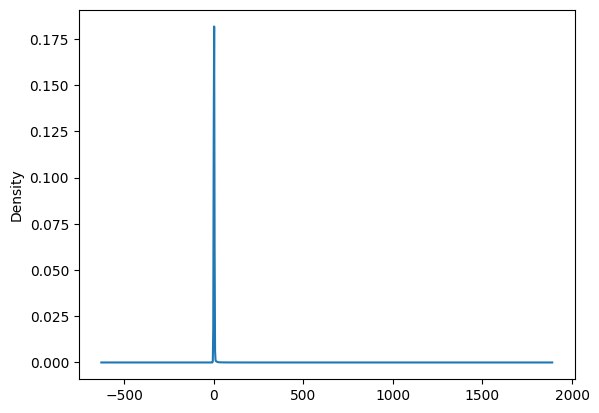

In [11]:
countsA.plot.density()

In [12]:
# Choose a cutoff value and create a list of names_replace to be replaced
# use the variable name names_replace
names_replace = list(countsA[countsA<5].index)
names_replace

# Replace in dataframe
for name in names_replace:
    application_df['NAME'] = application_df['NAME'].replace(name,"Other")

# Check to make sure binning was successful
application_df['NAME'].value_counts()

Other                                                                19803
PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
                                                                     ...  
GUILDS OF THE SANTA FE OPERA INC                                         5
FAMILY MOTOR COACH ASSOCIATION                                           5
JAMESTOWN SOCIETY                                                        5
MOST WORSHIPFUL PRINCE HALL GRAND LODGE OF FREE & ACCEPTED MASONS        5
PTA HAWAII CONGRESS                                                      5
Name: NAME, Length: 403, dtype: int64

In [13]:
# Convert categorical data to numeric with `pd.get_dummies`
application_dummies = pd.get_dummies(application_df)
application_dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [14]:
# Split our preprocessed data into our features and target arrays
X = application_dummies.drop('IS_SUCCESSFUL', axis=1).values
y = application_dummies['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 78)


In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = X_train_scaled.shape[1]
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 16
# hidden_nodes_layer3 = 24
# hidden_nodes_layer4 = 10


# 2.	Create a neural network model by assigning the number of input features and nodes for each layer using TensorFlow and Keras
nn_model1 = tf.keras.models.Sequential()

# First hidden layer and choose an appropriate activation function.
nn_model1.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation='relu', input_dim=input_features))

# # Second hidden layer with an appropriate activation function
nn_model1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# # Add more hidden layers & use different activation functions
# nn_model1.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='sigmoid'))

# Add more hidden layers & use different activation functions
# nn_model1.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation='sigmoid'))

# Output layer with an appropriate activation function
nn_model1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 3832      
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,993
Trainable params: 3,993
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model (2nd)
nn_model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Create a callback that saves the model's weights every epoch
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define checkpoints variables
checkpoint_path= '../checkpoints/weights.{epoch}.hdf5'

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=2,
    save_weights_only=True,
    save_freq='epoch')

# Train the model
fit_model = nn_model1.fit(X_train_scaled,y_train,epochs=10,callbacks=[cp_callback])

Epoch 1/10
795/804 [============================>.] - ETA: 0s - loss: 0.5193 - accuracy: 0.7543
Epoch 1: saving model to ../checkpoints/weights.1.hdf5
804/804 [==============================] - 3s 2ms/step - loss: 0.5184 - accuracy: 0.7542
Epoch 2/10
790/804 [============================>.] - ETA: 0s - loss: 0.4403 - accuracy: 0.7880
Epoch 2: saving model to ../checkpoints/weights.2.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.4403 - accuracy: 0.7881
Epoch 3/10
790/804 [============================>.] - ETA: 0s - loss: 0.4318 - accuracy: 0.7921
Epoch 3: saving model to ../checkpoints/weights.3.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.4318 - accuracy: 0.7922
Epoch 4/10
803/804 [============================>.] - ETA: 0s - loss: 0.4292 - accuracy: 0.7940
Epoch 4: saving model to ../checkpoints/weights.4.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4290 - accuracy: 0.7941
Epoch 5/10
786/804 [====================

In [19]:
model_loss, model_accuracy = nn_model1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.4393 - accuracy: 0.7883 - 504ms/epoch - 2ms/step
Loss: 0.4393139183521271, Accuracy: 0.7883381843566895


In [21]:
#	Save and export your results to an HDF5 file. Name the file AlphabetSoupCharity.h5.
# Export our model to HDF5 file
from google.colab import files

nn_model1.save('../h5/AlphabetSoupCharity_Optimization.h5')